Diabetes - Group Project Proposal

By: Nikki De Chavez, Maddie Lilly, Vincent Wang, Zhitong Zou

In [22]:
# Packages
library(tidyverse)
library(tidymodels)

Introduction:

Diabetes mellitus (commonly known as diabetes) is a metabolic disease wherein glucose metabolism is uncontrolled as a result of an individual’s insufficient insulin activity (“Diabetes,” 2018). Insulin is a hormone produced by the beta cells of the pancreas that regulates many metabolic pathways, one of which is the glucose metabolic pathways that helps to manage blood sugar levels (Kelley, 2000).

When food is eaten, glucose from the food enters the blood, increasing blood glucose concentrations (National Institute of Diabetes and Digestive and Kidney Diseases [NIDDK], 2016). High blood glucose levels cause insulin production, helping glucose to be transported to various cells of the body as a source of energy and allowing for normal blood glucose levels to be maintained (NIDDK, 2016). Insufficient insulin activity results in high blood glucose levels (hyperglycaemia) which is one of the major symptoms of diabetes mellitus (Watkins, 1982).

There are many types of diabetes, such as type 1 diabetes, type 2 diabetes, and gestational diabetes (Egan & Dinneen, 2022). Because of the limitations of the dataset, however, this project will only try to predict whether a patient does or does not have diabetes without specifying the type. Knowing whether a person is diabetic or not is important because it can result in strokes, heart and/or kidney diseases, eye problems, nerve damage, and many more (NIDDK, 2016).

The question we would like to answer is:  Can we use the observations taken by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) to predict whether a female patient has diabetes or not?

To answer this question, the dataset that will be used is originally from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) which conducts research on many chronic diseases to find its causes and effects (NIDDK, 2016).

Where we found the dataset: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

The NIDDK conducted this research using the diagnostic records of female patients, all of whom are at least 21 years old and of Pima Indian heritage (2016).
There are 9 variables in the dataset, which are:

1. Pregnancies: Number of times pregnant 
2. Glucose: Plasma glucose concentration after 2 hours (determined using an oral glucose tolerance test)
3. BloodPressure: Diastolic blood pressure (mm Hg) 
4. SkinThickness: Triceps skin fold thickness (mm) 
5. Insulin: 2-Hour serum insulin (mu U/ml) 
6. BMI: Body mass index (weight in kg/(height in m)^2) 
7. DiabetesPedigreeFunction: Diabetes pedigree function 
8. Age: Age (years) 
9. Outcome: Class variable (0 or 1)

Note: 0 is interpreted as not having diabetes, while 1 is interpreted as having diabetes

Premiliniary Exploratory Data Analysis

In [26]:
# The code which shows that the dataset can be read from the web into R
# Also, since we are trying to predict whether a patient has diabetes or not, the mutate() function is used to mutate the Outcome column such that it is a factor variable 

diabetes <- read_csv("diabetes.csv") |>
    mutate(Outcome = as_factor(Outcome))
diabetes

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [24]:
set.seed(34521)

# The code for splitting the dataset into training data and testing data
diabetes_split <- initial_split(diabetes, prop = .75, strata = Outcome)
diabetes_test <- testing(diabetes_split)
diabetes_train <- training(diabetes_split)

# The code for filtering the training data and finding out the number of rows
missing_gluc <- nrow(filter(diabetes_train, Glucose == 0))
missing_ins <- nrow(filter(diabetes_train, Insulin == 0))
missing_bp <- nrow(filter(diabetes_train, BloodPressure == 0))
missing_skin <- nrow(filter(diabetes_train, SkinThickness == 0))
missing_BMI <- nrow(filter(diabetes_train, BMI == 0))
missing_age <- nrow(filter(diabetes_train, Age == 0))
missing_DPF <- nrow(filter(diabetes_train, DiabetesPedigreeFunction == 0))

Variable <- c("Glucose","BloodPressure","SkinThickness","Insulin","BMI", "DiabetesPedigreeFunction","Age")
TimesMissing <- c(missing_gluc,missing_bp,missing_skin, missing_ins,missing_BMI,missing_DPF, missing_age)

MissingVariablesDF <- data.frame(Variable, TimesMissing)
MissingVariablesDF

Variable,TimesMissing
<chr>,<int>
Glucose,3
BloodPressure,25
SkinThickness,161
Insulin,271
BMI,7
DiabetesPedigreeFunction,0
Age,0


The table above shows the number of rows of each variables (excpet Pregnancies and Outcome) that have a value of 0.

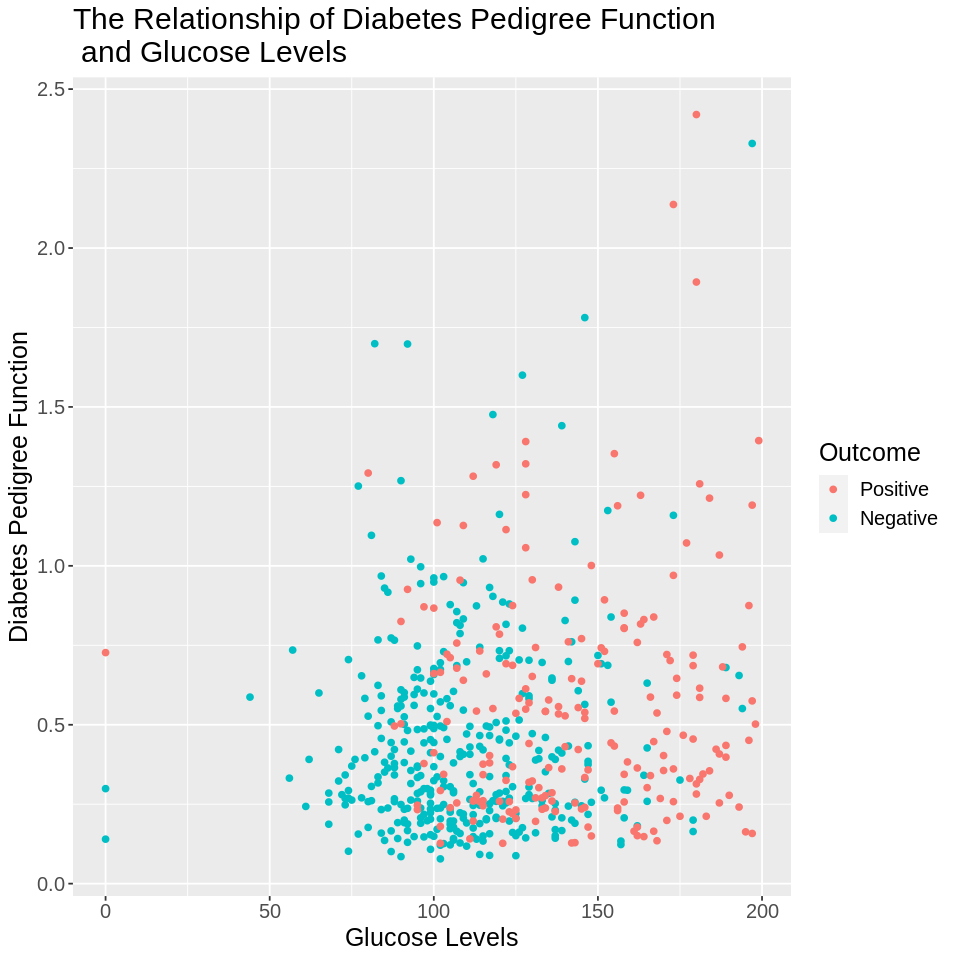

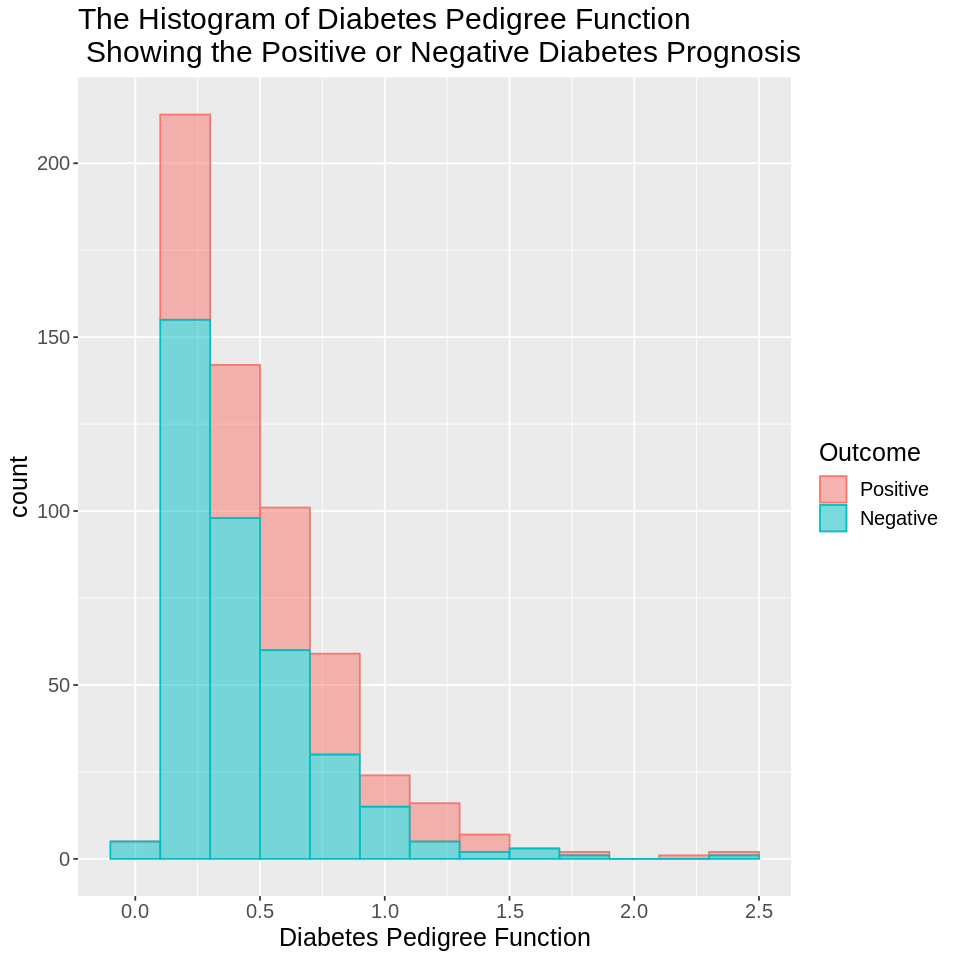

In [25]:
options(repr.plot.width = 8, repr.plot.height = 8)

diabetes_train$Outcome <- factor(diabetes_train$Outcome, levels=c("1", "0"), labels = c("Positive", "Negative")) 

# The code for the scatter plot of Diabetes Pedigree Function vs Glucose Levels
diabetes_point <- ggplot(diabetes_train, aes(x = Glucose, y = DiabetesPedigreeFunction)) +
    geom_point(aes(colour = Outcome)) +
    labs(x = "Glucose Levels", y = "Diabetes Pedigree Function", colour = "Outcome") +
    ggtitle("The Relationship of Diabetes Pedigree Function \n and Glucose Levels") +
    theme(text = element_text(size = 15))
diabetes_point

# The code for the histogram of Diabetes Pedigree Function
diabetes_hist <- ggplot(diabetes_train, aes(x = DiabetesPedigreeFunction, colour = Outcome, fill = Outcome)) +
    geom_histogram(position="stack", binwidth=.2, alpha = .5) +
    labs(x = "Diabetes Pedigree Function", colour = "Outcome") +
    ggtitle("The Histogram of Diabetes Pedigree Function \n Showing the Positive or Negative Diabetes Prognosis") +
    theme(text = element_text(size = 15))
diabetes_hist

On the scatter plot above, glucose levels was plotted on the x- axis while the diabetes pedigree function was plotted on the y-axis. The colors indicate whether the female patient is positive or negative for diabetes. We see that those who have diabetes tend to have higher glucose levels. However, it looks like the diabetes pedigree function is similar to those who have and do not have diabetes, so a histogram of diabetes pedigree function was plotted.

The histogram above shows the distribution of the diabetes pedigree function. The colors also indicate whether the female patient is positive or negative for diabetes. This histogram shows that diabetic people seem to have similar diabetes pedigree function levels to non-diabetic people.

It is also important to note that the 0/1 values for the variable "Outcome" has been changed to positive/negative values.

Methods

We will conduct our data analysis using a k-nearest neighbors classification function. 
To find the k that is most suitable for our prediction, we will use v-fold cross validation. 

First, we will randomly select a certain percentage of the dataset (75% of the data) to be the training data and the rest of the dataset to be the testing data, and choose one column (“Outcome”) to be the strata. 

After that, we will scale and center the data since the K-nearest neighbors is sensitive to the scale of the predictors.

Then, we will do cross-validation wherein we split the training data into a training set and validation set (the training data subset used for evaluation), and perform a workflow analysis wherein the fit_resamples() function will allow us to run a cross-validation on the training/validation splits created.

To find out the accuracy of the classifier’s validation across folds, we will use the collect_metrics() function to get the average prediction accuracy for our classifier. We will also find out the accuracy for each K- value within a reasonable range and choose the K value with the best average accuracy.

Explanation of which variables/columns to use and how we can visualize the results:

We will predict the binary column of “Outcome” where 0 indicates that the patient DOES NOT have diabetes and 1 indicates that the patient DOES have diabetes. 

The columns we will use to predict “Outcome” are “Glucose”, “BloodPressure”, “SkinThickness”, “BMI”, “DiabetesPedigreeFunction”, and “Age”. We chose these columns because according to the Centers for Disease Control and Prevention (2022), age, family history (diabetes pedigree function), and BMI are variables that act as risk factors and play a role in diabetes pathology. Additionally, high blood pressure, high plasma glucose concentration, and skin thickness act as risk factors as well (Abdul-Ghani & DeFronzo, 2009; Labib et al., 2022; Johns Hopkins Medicine, n.d.). Therefore, by inputting these predictors into a k-nearest neighbors classification function with our diabetes training data, we will be able to predict “Outcome” in our testing data. 

One way that we will visualize our results is by using various scatter plots, with “Age” on the x axis and the rest of the predictors on the y axis, with the data points colored and shaped by “Outcome.” Furthermore, by using the facet_grid() and/or the plot_grid() functions, we would arrange our graphs horizontally and/or vertically. This will allow us to visualize the relationship and distribution of outcomes.

Expected Outcomes and Significance

We expect to find a reliable model for predicting whether or not a female patient has diabetes using their records/measurements for their plasma glucose concentration, blood pressure, skin thickness, BMI, diabetes pedigree function, and age. 

These findings could have an immense impact on early diagnosis and treatment of diabetes. If we notice that an individual has elevated levels of the variables used as predictors in our k-nearest neighbor classification, we could use our model to predict whether or not she has diabetes. This would be beneficial because the diagnosis process wouldn’t take 2-3 months as it does using the A1C test (a blood test that provides information about blood sugar levels over the past 3 months and is used to diagnose the type of diabetes, if any) (NIDDK, 2016). Also, it wouldn’t require fasting as it does in the fasting blood sugar test or glucose tolerance test. 

A future direction for diabetes research could address which variables in particular have the largest impact on diabetes risk and whether or not it is affected by hereditary or independent causes. Since we are using many variables in our classifier, it would be useful to narrow down which variables are the most meaningful for accurate predictions due to being the strongest predictors of diabetes. A possible future question would be to ask whether or not being genetically predisposed to diabetes would change which variables are the most meaningful in accurate diabetes prognosis and be different from the variables for predicting non-hereditary diabetes.

Resources:

Abdul-Ghani, M., & DeFronzo, R. (2009). Plasma glucose concentration and prediction of future risk of type 2 diabetes. Diabetes care, 32 Suppl 2(Suppl 2), S194–S198. https://doi.org/10.2337/dc09-S309

Centers for Disease Control and Prevention. (2022). Diabetes Risk Factors. https://www.cdc.gov/diabetes/basics/risk-factors.html

Diabetes. (2018). In John Last & Miquel Porta (Eds.), Dictionary of Public Health (2nd ed.). Oxford University Press.
 
Egan, A., & Dinneen, S. (2022). What is diabetes? Medicine (Abingdon. 1995, UK Ed.), 50(10), 615-618. https://doi.org/10.1016/j.mpmed.2022.07.001

Johns Hopkins Medicine. (n.d.). Diabetes and High Blood Pressure. https://www.hopkinsmedicine.org/health/conditions-and-diseases/diabetes/diabetes-and-high-blood-pressure#:~:text=High%20blood%20pressure%20is%20twice,to%20heart%20disease%20and%20stroke

Kelley, D. (2000). Overview: What is insulin resistance? Nutrition Reviews, 58(3), S2-3. https://www.proquest.com/scholarly-journals/overview-what-is-insulin-resistance/docview/212322216/se-2

Labib, A., Rosen, J., & Yosipovitch, G. (2022). Skin Manifestations of Diabetes Mellitus. National Library of Medicine. https://www.ncbi.nlm.nih.gov/books/NBK481900/

National Institute of Diabetes and Digestive and Kidney Diseases. (2016). What is diabetes? https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes

Watkins, P. (1982). What Is Diabetes? British Medical Journal (Clinical Research Edition), 284(6330), 1690–1692. http://www.jstor.org/stable/29506707